In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats
import vcf
import seaborn.apionly as sns
from collections import defaultdict

ANNOTDIR = "/storage/mgymrek/gtex/annotations/"
FEATUREDIR = "/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/"
HTDIR = "/storage/mgymrek/gtex/tfbs/encodedata/"
BEDDIR = "/storage/mgymrek/gtex/annotations/encode/"
mergefile = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/Merged_Best_causality.Table'
REGRSSION = '/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/LR_SummaryTest_Table.tsv'
SCORETYPE = ""
MINDIST = 1500 # For TSS
MINQ = 1 # FDR threshold. Ignored since overlap with Estrs later

path='/storage/szfeupe/Runs/650GTEx_estr/'

command = "zgrep 'HOM_POLY' "+ path+"Filter_Merged_STRs_All_Samples.vcf.gz | cut -f 1,2,3,4 > "+path+"original_homopoly"
out = os.system(command)


Motifs = pd.read_csv('/storage/resources/dbase/human/hg19/hg19.hipstr_reference_withmotif.bed', sep='\t', header=None)
Motifs.columns = ['chrom','str.start','str.end','motif.len','motif']

genopd = pd.read_csv(path+"original_homopoly", sep='\t', skiprows=1)
genopd.columns=["chrom","start","str.id","reference"]

LR = pd.read_csv(path+"Analysis_by_Tissue/LR_SummaryTest_Table.tsv", sep='\t')
LR = LR.loc[LR['period']==1]

genopd['end'] = genopd.apply(lambda x: int(x['start'])+len(x['reference'])+2, 1)
genopd[['chrom',"start","end"]].to_csv('reg.bed', header=None, index=None, sep='\t')

/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
genopd[['chrom',"start","end"]].to_csv('reg.tab', header=None, index=None, sep='\t')
# LIst of features to intersect with
FEATURES = {
    "3utr": os.path.join(ANNOTDIR, "3utr.bed"),
    "5utr": os.path.join(ANNOTDIR, "5utr.bed"),
    "coding": os.path.join(ANNOTDIR, "coding.bed"),
    "introns": os.path.join(ANNOTDIR, "introns.bed"),
    "H3K27ac": os.path.join(HTDIR, "H3K27ac_GM12878.bed.gz"),
    "H3K4me1": os.path.join(HTDIR, "H3K4me1_GM12878.bed.gz"),
    "H3K4me2": os.path.join(HTDIR, "H3K4me2_GM12878.bed.gz"),
    "H3K4me3": os.path.join(HTDIR, "H3K4me3_GM12878.bed.gz"),
    "H3K27me3": os.path.join(HTDIR, "H3K27me3_GM12878.bed.gz"),
    "H3K36me3": os.path.join(HTDIR, "H3K36me3_GM12878.bed.gz"),
}

genopd

,chrom,start,str.id,reference,end
0,1,31720,STR_6,AAAAAAAAAAAAAAGTAC,31740
1,1,33450,STR_7,ATTAAAAAAAAAAAAAAAG,33471
2,1,33521,STR_8,TTTTTTTTTCTTTTTTTTTTTATATA,33549
3,1,36352,STR_10,GGAAAAAAAAAAAAA,36369
4,1,43797,STR_12,AAAAAAAAAAAAAAAA,43815
5,1,46403,STR_14,TTTTTTTTTTTTTTG,46420
6,1,49510,STR_15,AAAAAGAAAAAGAAAAAAAGAAAAATC,49539
7,1,51865,STR_18,CTCAAAAAAAAAAAAA,51883
8,1,61351,STR_20,TTTGTAAAAAAAAAAA,61369
9,1,61863,STR_21,TTTTTTTTCTTTTTTTTTGAG,61886


In [16]:
for key in FEATURES.keys():
    #print(key)
    bedfile = FEATURES[key]
    print(bedfile)
    annot = pd.read_csv(bedfile, sep="\t", header=None, skiprows=1)
    annot['chr'] = annot[0].apply(lambda x: x[3:],)
    annot[['chr',1,2]].to_csv('facts.bed', sep='\t',index=None, header=None)
    cmd = "bedtools intersect -a reg.tab -b facts.bed -wa > Intersect.tab"
    returned_value = os.system(cmd)
    Inter = pd.read_csv('Intersect.tab', sep='\t', header=None).drop_duplicates()


    print('\n',Inter.shape[0]*100/genopd.shape[0],'% overlaps with ',key, '(',Inter.shape[0],')')#,COUNT.loc[COUNT['motif']=='A'].shape[0],' As',   )



/storage/mgymrek/gtex/annotations/5utr.bed

 0.30227799688678986 % overlaps with  5utr ( 2507 )
/storage/mgymrek/gtex/annotations/coding.bed

 0.09682059493422107 % overlaps with  coding ( 803 )
/storage/mgymrek/gtex/annotations/introns.bed


/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



 50.74279361779859 % overlaps with  introns ( 420845 )
/storage/mgymrek/gtex/tfbs/encodedata/H3K4me2_GM12878.bed.gz

 2.468744310433595 % overlaps with  H3K4me2 ( 20475 )
/storage/mgymrek/gtex/tfbs/encodedata/H3K27ac_GM12878.bed.gz

 1.9326741173108712 % overlaps with  H3K27ac ( 16029 )
/storage/mgymrek/gtex/tfbs/encodedata/H3K36me3_GM12878.bed.gz

 1.2575825718106175 % overlaps with  H3K36me3 ( 10430 )
/storage/mgymrek/gtex/tfbs/encodedata/H3K4me1_GM12878.bed.gz

 1.4660543135805655 % overlaps with  H3K4me1 ( 12159 )
/storage/mgymrek/gtex/tfbs/encodedata/H3K4me3_GM12878.bed.gz

 1.4119167704604343 % overlaps with  H3K4me3 ( 11710 )
/storage/mgymrek/gtex/annotations/3utr.bed

 1.1944020092383487 % overlaps with  3utr ( 9906 )
/storage/mgymrek/gtex/tfbs/encodedata/H3K27me3_GM12878.bed.gz

 0.07511734824909057 % overlaps with  H3K27me3 ( 623 )


In [18]:
0.30227799688678986*100/1.1944020092383487

25.307894205532

In [3]:
LR['size']=LR['str.end']-LR['str.start']
print (max(list(LR['size'])), min(list(LR['size'])))
estrs = LR.loc[LR['E.tissues']>=1]

71 10


11252  genes tested
10.0 71.0 
 [10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70.]
[6516, 2067, 1473, 1265, 787, 412, 178, 75, 24, 15, 6, 3]


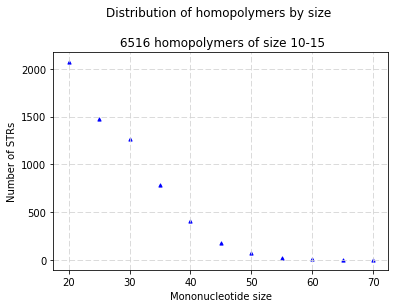

In [12]:
PR = LR.drop_duplicates(['str.id'])
print(len(set(list(LR['gene']))), ' genes tested')
PR = PR[['chrom','str.id','size','E.tissues']]

L = list(PR['size'].astype(float))
bin_values = np.arange(start=min(L), stop=max(L), step=5)
print(min(L), max(L),'\n',bin_values )
count=[]
binlabels=[]
for i in range(len(bin_values)-1):
    count.append(len([x for x in L if x>=bin_values[i] and x<bin_values[i+1]]))
    binlabels.append("%s-%s"%(bin_values[i], bin_values[i+1]))
print(count)
plt.scatter(bin_values[2:], count[1:], color='blue',label='dist', marker='^', s=10)
plt.xlabel('Mononucleotide size')
plt.ylabel('Number of STRs')
plt.grid(color='lightgrey', linestyle='--')
plt.title("Distribution of homopolymers by size \n\n "+str(count[0])+' homopolymers of size '+str(int(bin_values[0]))+'-'+str(int(bin_values[1])))

plt.show()

10.0 63.0


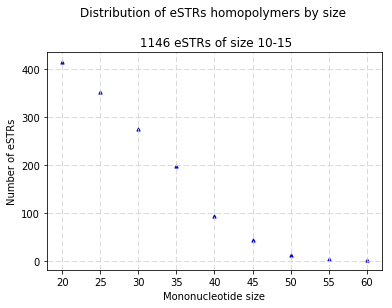

In [13]:
estrs = LR.loc[LR['E.tissues']>=1]
PR = estrs.drop_duplicates(['str.id'])
PR = PR[['chrom','str.id','size','E.tissues']]
L = list(PR['size'].astype(float))
bin_values = np.arange(start=min(L), stop=max(L), step=5)
count=[]
for i in range(len(bin_values)-1):
    count.append(len([x for x in L if x>=bin_values[i] and x<bin_values[i+1]]))
plt.scatter(bin_values[2:], count[1:], color='blue',label='dist', marker='^', s=10)
plt.xlabel('Mononucleotide size')
plt.ylabel('Number of eSTRs')
plt.grid(color='lightgrey', linestyle='--')
plt.title("Distribution of eSTRs homopolymers by size \n\n "+str(count[0])+' eSTRs of size '+str(int(bin_values[0]))+'-'+str(int(bin_values[1])))


print(min(L), max(L))
plt.show()

In [ ]:
#number of mono (832204, 5)


#